Basic operations in image processing

2.Convert grayscale image to binary using list of comprehension method and plot processing time comparison with another methods.

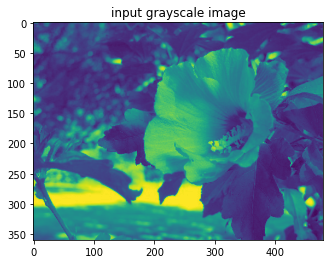

360 480
(172800,)
time taken to convert from grayscale to binary by LOC method: 0.16785526275634766


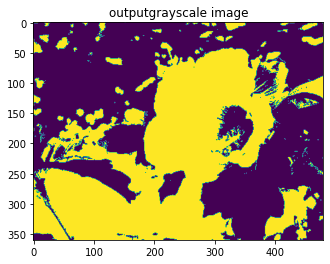

time taken for grayscale to binary : for loop method 0.3403306007385254


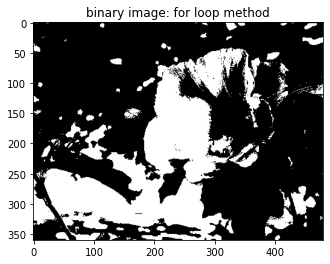

time taken for grayscale to binary by cv2 method: 0.0


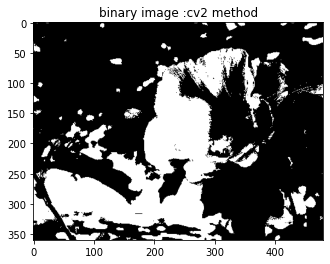

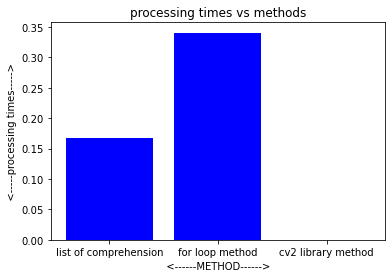

In [5]:
# we will convert the same greyscale image to binary image

#method 1: list of comprehension method
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2

def gray2bin(img1, thresh):
    r= lambda i: 1 if i > thresh else 0
    row, col= img1.shape
    print(row,col)
    img_copy = np.reshape(img1, (row*col))
    print(img_copy.shape)
    img_b = np.zeros([row, col])
    img_b = np.asarray([r(i)  for i in img_copy ])
    img_b = np.reshape(img_b, [row, col])
    return img_b
img1=plt.imread('C:\\Users\mayan\Downloads\Rose.jpg',0)
img = np.mean(img1, axis=2)
plt.imshow(img)
plt.title('input grayscale image')
plt.show()
t11=time.time()
imgb=gray2bin(img,90)
t12=time.time()
t_locb=t12-t11
print("time taken to convert from grayscale to binary by LOC method:",t_locb)
plt.imshow(imgb)
plt.title('outputgrayscale image')
plt.show()


    
#method 2: for loop method   
prop=img.shape
t01=time.time()
for i in range(prop[0]):
    for j in range( prop[1]):
        if img[i][j] <= 127:
            img[i][j] = 0
        else:
            img[i][j] = 255
t02=time.time()
t_floop=t02-t01
print('time taken for grayscale to binary : for loop method',t_floop)
cv2.imwrite('rose_binary.jpg',img)
img = cv2.imread('rose_binary.jpg')
plt.imshow(img)
plt.title('binary image: for loop method')
plt.show()

#method3: using cv2 function
t03=time.time()
(thresh, B_W_Image)=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
t04=time.time()
t_cv2bin=t04-t03
print('time taken for grayscale to binary by cv2 method:',t_cv2bin)
plt.imshow(B_W_Image)
plt.title('binary image :cv2 method')
plt.show()

#Comparing processing times of different methods for bgr to gray scale conversion
x=['list of comprehension','for loop method','cv2 library method']
process_times=[t_locb,t_floop,t_cv2bin]
x_pos=[i for i in range(len(x))]
plt.bar(x_pos,process_times,color='blue')
plt.xlabel('   <------METHOD------>   ')
plt.ylabel('   <-----processing times----->   ')
plt.title('processing times vs methods')
plt.xticks(x_pos,x)
plt.show()